In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [3]:
pokemon = pd.read_csv('/content/drive/MyDrive/data_science_dataset/pokemons.csv')
pokemon

,id,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total,height,weight,abilities,desc
0,1,bulbasaur,ordinary,generation-i,nothing,grass,poison,45,49,49,65,65,45,318,7,69,overgrow chlorophyll,A strange seed was planted on its back at birt...
1,2,ivysaur,ordinary,generation-i,bulbasaur,grass,poison,60,62,63,80,80,60,405,10,130,overgrow chlorophyll,"When the bulb on its back grows large, it appe..."
2,3,venusaur,ordinary,generation-i,ivysaur,grass,poison,80,82,83,100,100,80,525,20,1000,overgrow chlorophyll,The plant blooms when it is absorbing solar en...
3,4,charmander,ordinary,generation-i,nothing,fire,None,39,52,43,60,50,65,309,6,85,blaze solar-power,"Obviously prefers hot places. When it rains, s..."
4,5,charmeleon,ordinary,generation-i,charmander,fire,None,58,64,58,80,65,80,405,11,190,blaze solar-power,"When it swings its burning tail, it elevates t..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,1013,sinistcha,ordinary,generation-ix,poltchageist,grass,ghost,71,60,106,121,80,70,508,2,22,hospitality heatproof,Not Available
1013,1014,okidogi,legendary,generation-ix,nothing,poison,fighting,88,128,115,58,86,80,555,18,922,toxic-chain zero-to-hero,Not Available
1014,1015,munkidori,legendary,generation-ix,nothing,poison,psychic,88,75,66,130,90,106,555,10,122,toxic-chain frisk,Not Available
1015,1016,fezandipiti,legendary,generation-ix,nothing,poison,fairy,88,91,82,70,125,99,555,14,301,toxic-chain technician,Not Available


In [4]:
pokemon.head(5)

,id,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total,height,weight,abilities,desc
0,1,bulbasaur,ordinary,generation-i,nothing,grass,poison,45,49,49,65,65,45,318,7,69,overgrow chlorophyll,A strange seed was planted on its back at birt...
1,2,ivysaur,ordinary,generation-i,bulbasaur,grass,poison,60,62,63,80,80,60,405,10,130,overgrow chlorophyll,"When the bulb on its back grows large, it appe..."
2,3,venusaur,ordinary,generation-i,ivysaur,grass,poison,80,82,83,100,100,80,525,20,1000,overgrow chlorophyll,The plant blooms when it is absorbing solar en...
3,4,charmander,ordinary,generation-i,nothing,fire,None,39,52,43,60,50,65,309,6,85,blaze solar-power,"Obviously prefers hot places. When it rains, s..."
4,5,charmeleon,ordinary,generation-i,charmander,fire,None,58,64,58,80,65,80,405,11,190,blaze solar-power,"When it swings its burning tail, it elevates t..."


In [5]:
pokemon.tail(5)

,id,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total,height,weight,abilities,desc
1012,1013,sinistcha,ordinary,generation-ix,poltchageist,grass,ghost,71,60,106,121,80,70,508,2,22,hospitality heatproof,Not Available
1013,1014,okidogi,legendary,generation-ix,nothing,poison,fighting,88,128,115,58,86,80,555,18,922,toxic-chain zero-to-hero,Not Available
1014,1015,munkidori,legendary,generation-ix,nothing,poison,psychic,88,75,66,130,90,106,555,10,122,toxic-chain frisk,Not Available
1015,1016,fezandipiti,legendary,generation-ix,nothing,poison,fairy,88,91,82,70,125,99,555,14,301,toxic-chain technician,Not Available
1016,1017,ogerpon,legendary,generation-ix,nothing,grass,None,80,120,84,60,96,110,550,12,398,defiant,Not Available


In [6]:
pokemon.columns

Index(['id', 'name', 'rank', 'generation', 'evolves_from', 'type1', 'type2',
       'hp', 'atk', 'def', 'spatk', 'spdef', 'speed', 'total', 'height',
       'weight', 'abilities', 'desc'],
      dtype='object')

In [7]:
pokemon.shape

(1017, 18)

In [8]:
pokemon[['name']]

,name
0,bulbasaur
1,ivysaur
2,venusaur
3,charmander
4,charmeleon
...,...
1012,sinistcha
1013,okidogi
1014,munkidori
1015,fezandipiti


In [9]:
pokemon.isna().sum()

id              0
name            0
rank            0
generation      0
evolves_from    0
type1           0
type2           0
hp              0
atk             0
def             0
spatk           0
spdef           0
speed           0
total           0
height          0
weight          0
abilities       0
desc            0
dtype: int64

In [10]:
pokemon['generation'].unique()

array(['generation-i', 'generation-ii', 'generation-iii', 'generation-iv',
       'generation-v', 'generation-vi', 'generation-vii',
       'generation-viii', 'generation-ix'], dtype=object)

In [11]:
pokemon['abilities'].nunique()

617

In [12]:
pokemon['desc'].unique()

array(['A strange seed was planted on its back at birth. The plant sprouts and grows with this POKéMON.',
       'When the bulb on its back grows large, it appears to lose the ability to stand on its hind legs.',
       'The plant blooms when it is absorbing solar energy. It stays on the move to seek sunlight.',
       ...,
       'This seems to be the Winged King mentioned in an old expedition journal. It was said to have split the land with its bare fists.',
       'Much remains unknown about this creature. It resembles Cyclizar, but it is far more ruthless and powerful.',
       'Not Available'], dtype=object)

In [13]:
pokemon['desc'].value_counts()

Not Available                                                                                                                                                                                              9
Apparently this Pokémon is born when a departed spirit inhabits a sword. It attaches itself to people and drinks their life force.                                                                         1
Vivillon with many different patterns are found all over the world. These patterns are affected by the climate of their habitat.                                                                           1
The stronger the opponent it faces, the more heat surges from its mane and the more power flows through its body.                                                                                          1
The male with the largest mane of fire is the leader of the pride.                                                                                                                  

In [14]:
pokemon['rank'].unique()

array(['ordinary', 'legendary', 'mythical', 'baby'], dtype=object)

In [15]:
pokemon['evolves_from'].unique()

array(['nothing', 'bulbasaur', 'ivysaur', 'charmander', 'charmeleon',
       'squirtle', 'wartortle', 'caterpie', 'metapod', 'weedle', 'kakuna',
       'pidgey', 'pidgeotto', 'rattata', 'spearow', 'ekans', 'pichu',
       'pikachu', 'sandshrew', 'nidoran-f', 'nidorina', 'nidoran-m',
       'nidorino', 'cleffa', 'clefairy', 'vulpix', 'igglybuff',
       'jigglypuff', 'zubat', 'oddish', 'gloom', 'paras', 'venonat',
       'diglett', 'meowth', 'psyduck', 'mankey', 'growlithe', 'poliwag',
       'poliwhirl', 'abra', 'kadabra', 'machop', 'machoke', 'bellsprout',
       'weepinbell', 'tentacool', 'geodude', 'graveler', 'ponyta',
       'slowpoke', 'magnemite', 'doduo', 'seel', 'grimer', 'shellder',
       'gastly', 'haunter', 'drowzee', 'krabby', 'voltorb', 'exeggcute',
       'cubone', 'tyrogue', 'koffing', 'rhyhorn', 'happiny', 'horsea',
       'goldeen', 'staryu', 'mime-jr', 'smoochum', 'elekid', 'magby',
       'magikarp', 'eevee', 'omanyte', 'kabuto', 'munchlax', 'dratini',
       'drag

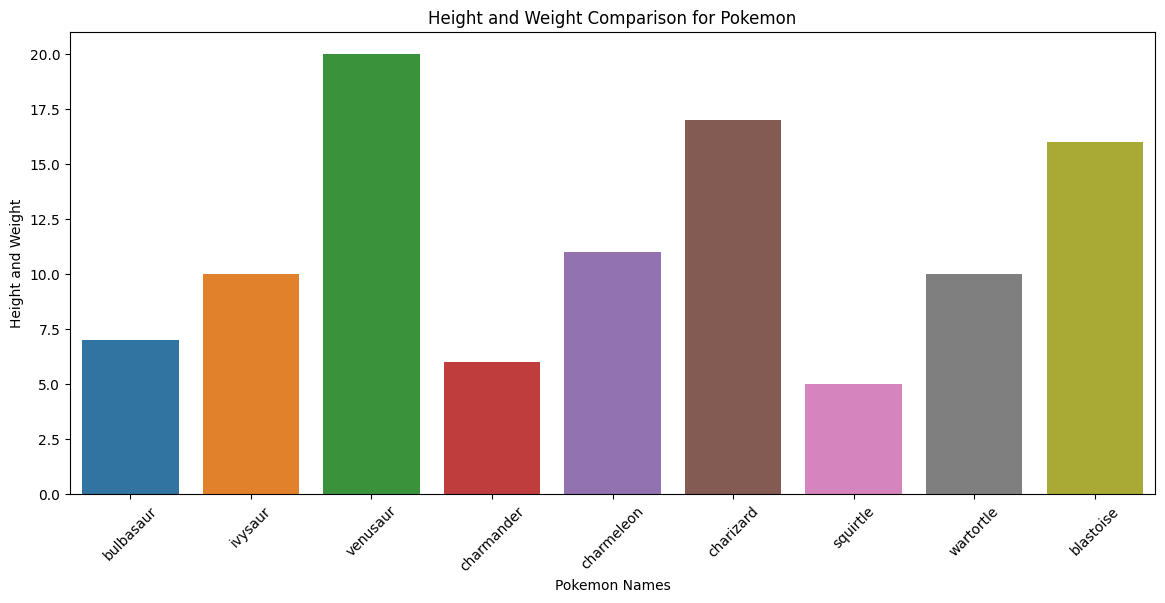

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

new_data = pokemon.head(9)

# Set the figure size
plt.figure(figsize=(14, 6))

# Create a grouped barplot for both height and weight
sns.barplot(data=new_data, x='name', y='height')

# Customize the plot
plt.xlabel('Pokemon Names')
plt.ylabel('Height and Weight')
plt.title('Height and Weight Comparison for Pokemon')
plt.xticks(rotation=45)
plt.show()

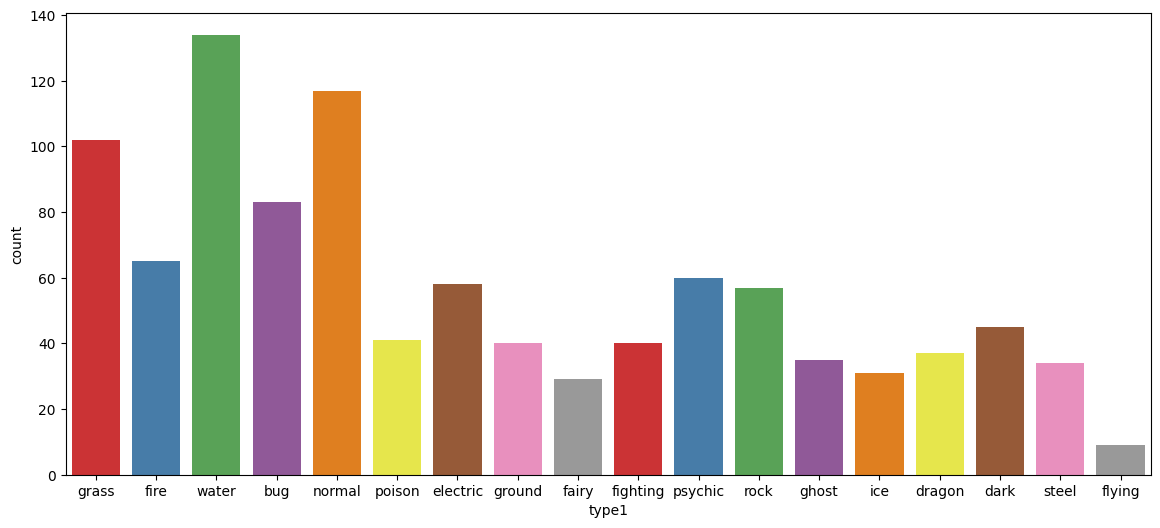

In [17]:
plt.figure(figsize=(14,6))
sns.countplot(data=pokemon, x="type1", palette="Set1")
plt.show()

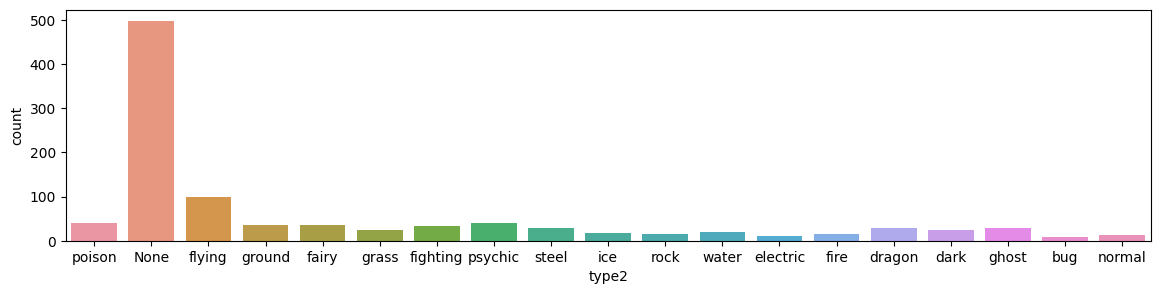

In [18]:
plt.figure(figsize=(14,3))
sns.countplot(data=pokemon,x='type2')
plt.show()

In [19]:
pokemon[pokemon.name=='pikachu']

,id,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total,height,weight,abilities,desc
24,25,pikachu,ordinary,generation-i,pichu,electric,None,35,55,40,50,50,90,320,4,60,static lightning-rod,"When several of these POKéMON gather, their el..."


In [20]:
pokemon.columns

Index(['id', 'name', 'rank', 'generation', 'evolves_from', 'type1', 'type2',
       'hp', 'atk', 'def', 'spatk', 'spdef', 'speed', 'total', 'height',
       'weight', 'abilities', 'desc'],
      dtype='object')

In [21]:
new_total = pokemon.loc[:,['hp', 'atk', 'def', 'spatk', 'spdef', 'speed', 'total']]
new_total

,hp,atk,def,spatk,spdef,speed,total
0,45,49,49,65,65,45,318
1,60,62,63,80,80,60,405
2,80,82,83,100,100,80,525
3,39,52,43,60,50,65,309
4,58,64,58,80,65,80,405
...,...,...,...,...,...,...,...
1012,71,60,106,121,80,70,508
1013,88,128,115,58,86,80,555
1014,88,75,66,130,90,106,555
1015,88,91,82,70,125,99,555


<Figure size 1400x600 with 0 Axes>

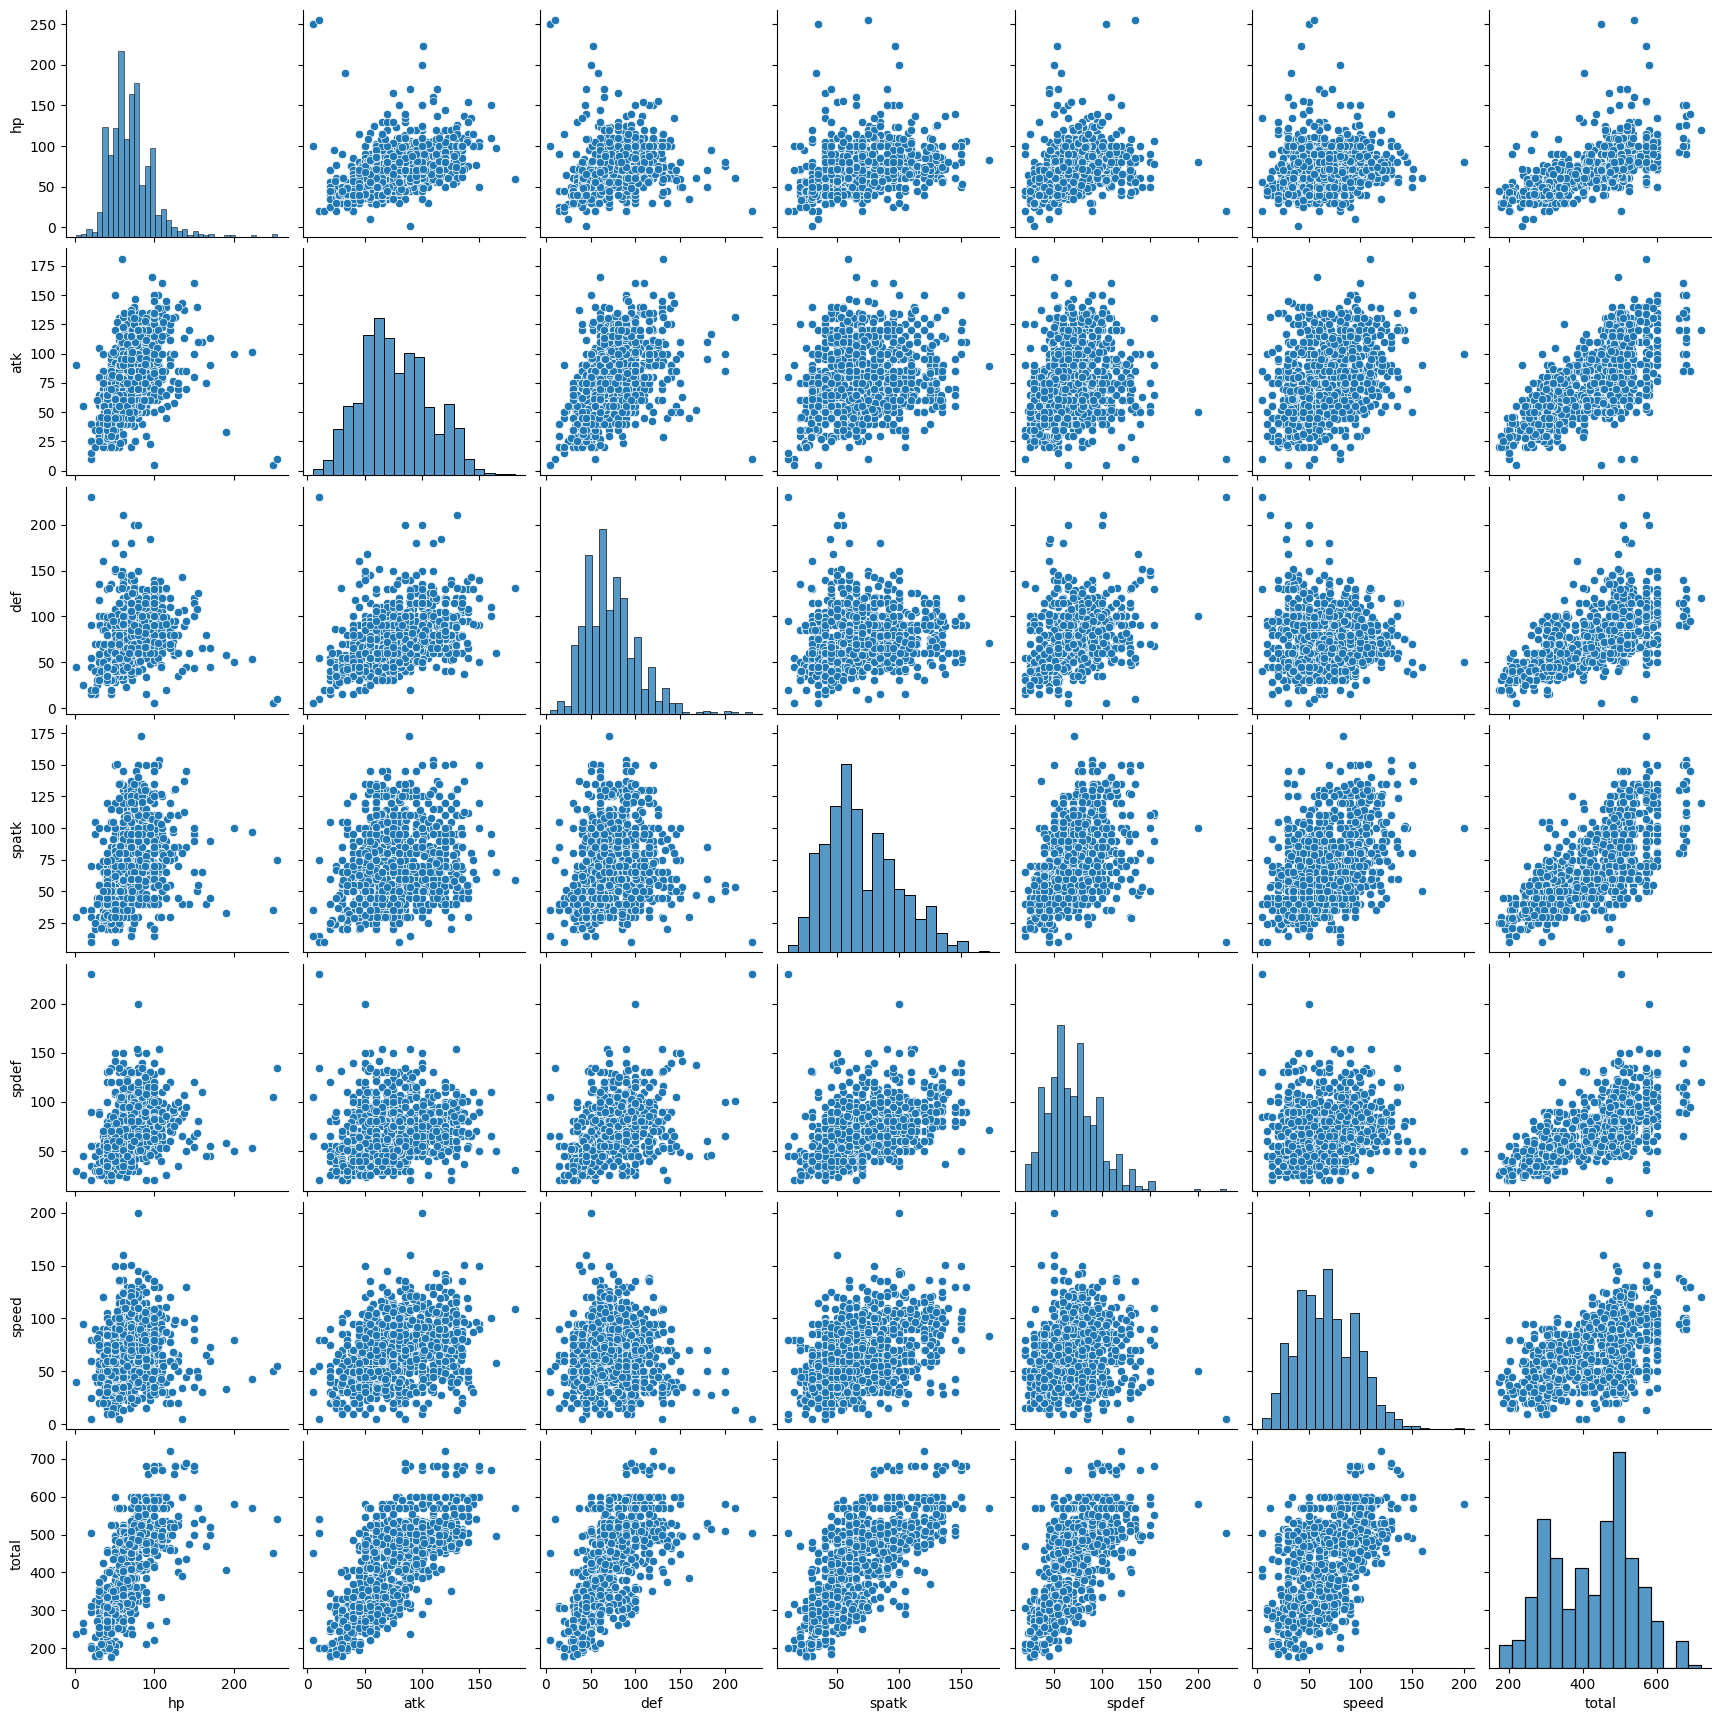

In [22]:
plt.figure(figsize=(14,6))
sns.pairplot(data=new_total)
plt.show()

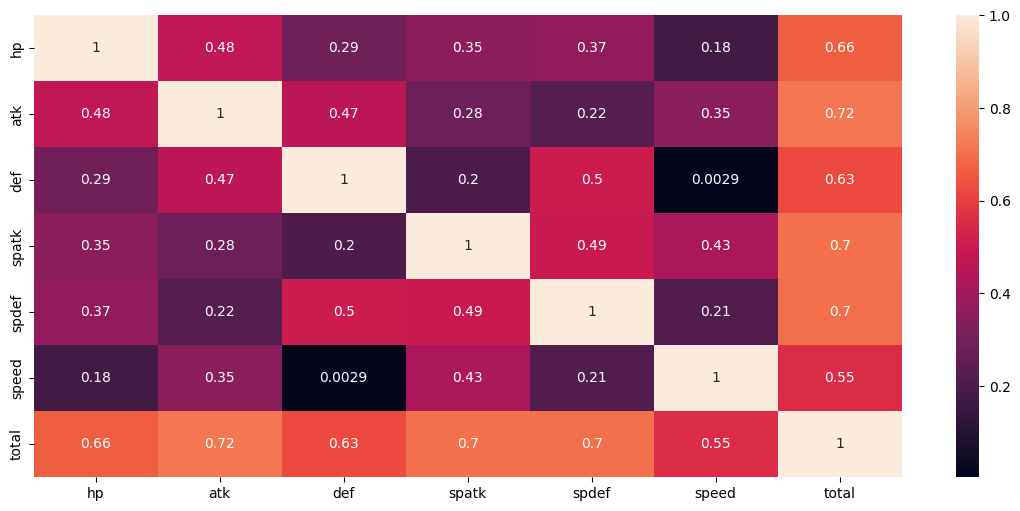

In [23]:
plt.figure(figsize=(14,6))
sns.heatmap(new_total.corr(),annot=True)
plt.show()

In [24]:
pokemon[['name','evolves_from']]

,name,evolves_from
0,bulbasaur,nothing
1,ivysaur,bulbasaur
2,venusaur,ivysaur
3,charmander,nothing
4,charmeleon,charmander
...,...,...
1012,sinistcha,poltchageist
1013,okidogi,nothing
1014,munkidori,nothing
1015,fezandipiti,nothing


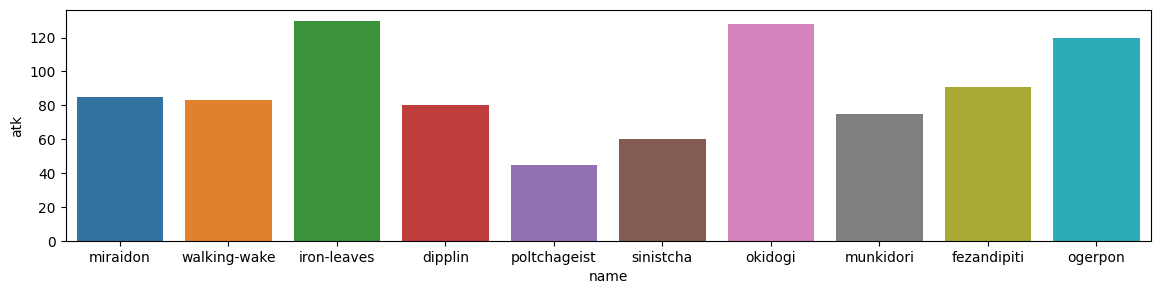

In [25]:
data = pokemon.tail(10)
plt.figure(figsize=(14,3))
sns.barplot(data=data,x='name',y='atk')
plt.show()

In [26]:
new_data.describe()

,id,hp,atk,def,spatk,spdef,speed,total,height,weight
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,5.000000,60.222222,65.222222,68.777778,77.111111,77.111111,67.666667,416.111111,11.333333,394.333333
std,2.738613,15.857000,14.584048,18.053932,19.173187,17.961378,18.500000,93.955368,5.244044,399.103996
min,1.000000,39.000000,48.000000,43.000000,50.000000,50.000000,43.000000,309.000000,5.000000,69.000000
25%,3.000000,45.000000,52.000000,58.000000,65.000000,65.000000,58.000000,318.000000,7.000000,90.000000
50%,5.000000,59.000000,63.000000,65.000000,80.000000,80.000000,65.000000,405.000000,10.000000,190.000000
75%,7.000000,78.000000,82.000000,80.000000,85.000000,85.000000,80.000000,525.000000,16.000000,855.000000
max,9.000000,80.000000,84.000000,100.000000,109.000000,105.000000,100.000000,534.000000,20.000000,1000.000000


In [27]:
pokemon[pokemon.name=='zygarde']

,id,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total,height,weight,abilities,desc
717,718,zygarde,legendary,generation-vi,nothing,dragon,ground,108,100,121,81,95,95,600,50,3050,aura-break,When the Kalos region’s ecosystem falls into d...


In [28]:
pokemon[pokemon.name=="abomasnow"]

,id,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total,height,weight,abilities,desc
459,460,abomasnow,ordinary,generation-iv,snover,grass,ice,90,92,75,92,85,60,494,22,1355,snow-warning soundproof,It whips up blizzards in mountains that are al...


In [29]:
pokemon['abilities'].value_counts()

levitate                             27
beast-boost                          11
quark-drive quark-drive               8
protosynthesis protosynthesis         8
shed-skin                             5
                                     ..
swarm shell-armor overcoat            1
swarm shed-skin no-guard              1
static motor-drive                    1
ice-body snow-warning weak-armor      1
defiant                               1
Name: abilities, Length: 617, dtype: int64

In [30]:
pokemon['desc']

0       A strange seed was planted on its back at birt...
1       When the bulb on its back grows large, it appe...
2       The plant blooms when it is absorbing solar en...
3       Obviously prefers hot places. When it rains, s...
4       When it swings its burning tail, it elevates t...
                              ...                        
1012                                        Not Available
1013                                        Not Available
1014                                        Not Available
1015                                        Not Available
1016                                        Not Available
Name: desc, Length: 1017, dtype: object

In [31]:
pokemon[:2]

,id,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total,height,weight,abilities,desc
0,1,bulbasaur,ordinary,generation-i,nothing,grass,poison,45,49,49,65,65,45,318,7,69,overgrow chlorophyll,A strange seed was planted on its back at birt...
1,2,ivysaur,ordinary,generation-i,bulbasaur,grass,poison,60,62,63,80,80,60,405,10,130,overgrow chlorophyll,"When the bulb on its back grows large, it appe..."


In [32]:
pokemon['abilities'].unique()

array(['overgrow chlorophyll ', 'blaze solar-power ',
       'torrent rain-dish ', 'shield-dust run-away ', 'shed-skin ',
       'compound-eyes tinted-lens ', 'swarm sniper ',
       'keen-eye tangled-feet big-pecks ', 'run-away guts hustle ',
       'keen-eye sniper ', 'intimidate shed-skin unnerve ',
       'static lightning-rod ', 'sand-veil sand-rush ',
       'poison-point rivalry hustle ',
       'poison-point rivalry sheer-force ',
       'cute-charm magic-guard friend-guard ',
       'cute-charm magic-guard unaware ', 'flash-fire drought ',
       'cute-charm competitive friend-guard ',
       'cute-charm competitive frisk ', 'inner-focus infiltrator ',
       'chlorophyll run-away ', 'chlorophyll stench ',
       'chlorophyll effect-spore ', 'effect-spore dry-skin damp ',
       'compound-eyes tinted-lens run-away ',
       'shield-dust tinted-lens wonder-skin ',
       'sand-veil arena-trap sand-force ', 'pickup technician unnerve ',
       'limber technician unnerve ', 'damp

In [33]:
pokemon.groupby('abilities').get_group('zero-to-hero zero-to-hero ')

,id,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total,height,weight,abilities,desc
963,964,palafin,ordinary,generation-ix,finizen,water,None,100,70,72,53,62,100,457,13,602,zero-to-hero zero-to-hero,This Pokémon changes its appearance if it hear...


In [34]:
pokemon.columns

Index(['id', 'name', 'rank', 'generation', 'evolves_from', 'type1', 'type2',
       'hp', 'atk', 'def', 'spatk', 'spdef', 'speed', 'total', 'height',
       'weight', 'abilities', 'desc'],
      dtype='object')

In [35]:
pok=pokemon['generation'].unique()
pok

array(['generation-i', 'generation-ii', 'generation-iii', 'generation-iv',
       'generation-v', 'generation-vi', 'generation-vii',
       'generation-viii', 'generation-ix'], dtype=object)

In [36]:
generation = pd.DataFrame(pokemon['generation'])
generation

,generation
0,generation-i
1,generation-i
2,generation-i
3,generation-i
4,generation-i
...,...
1012,generation-ix
1013,generation-ix
1014,generation-ix
1015,generation-ix


In [37]:
pd.get_dummies(generation)

,generation_generation-i,generation_generation-ii,generation_generation-iii,generation_generation-iv,generation_generation-ix,generation_generation-v,generation_generation-vi,generation_generation-vii,generation_generation-viii
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1012,0,0,0,0,1,0,0,0,0
1013,0,0,0,0,1,0,0,0,0
1014,0,0,0,0,1,0,0,0,0
1015,0,0,0,0,1,0,0,0,0


In [38]:
new_total.head()

,hp,atk,def,spatk,spdef,speed,total
0,45,49,49,65,65,45,318
1,60,62,63,80,80,60,405
2,80,82,83,100,100,80,525
3,39,52,43,60,50,65,309
4,58,64,58,80,65,80,405


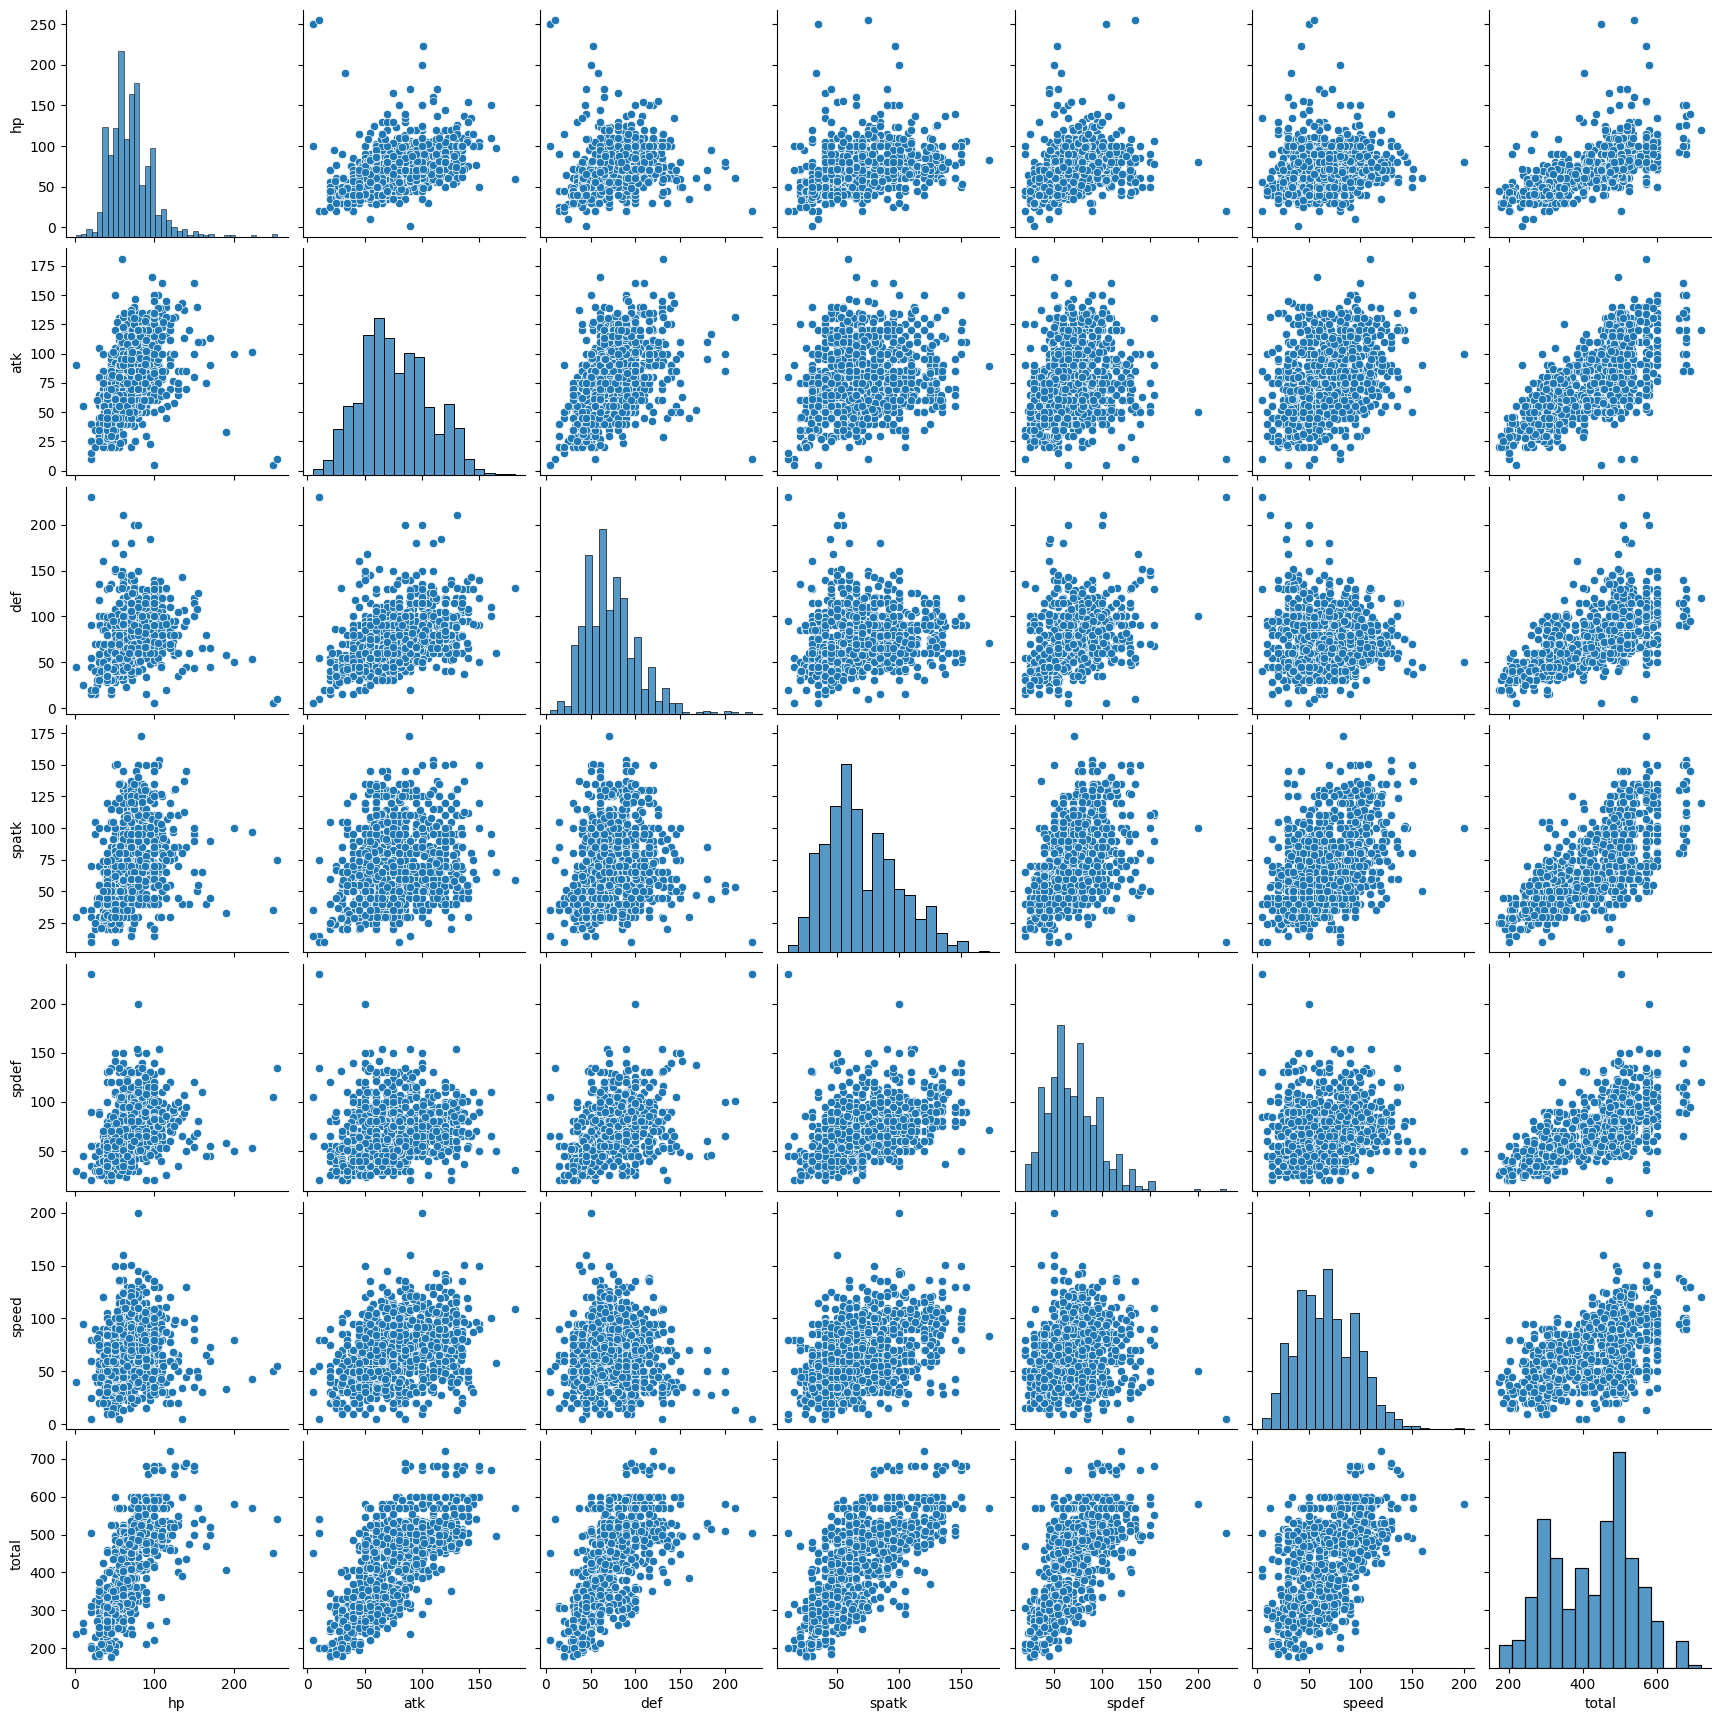

In [42]:
sns.pairplot(new_total)

<Axes: >

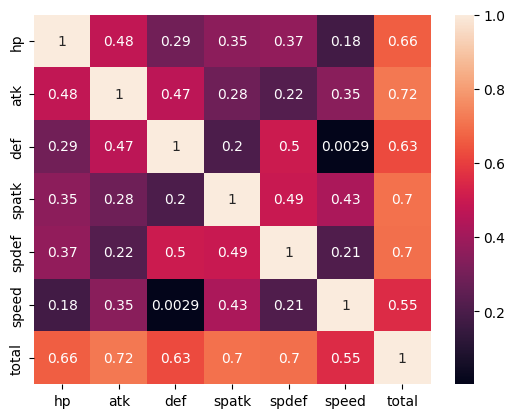

In [44]:
sns.heatmap(new_total.corr(),annot=True)